# Aviso

Esse material foi desenvolvido por Igor Peretta para a disciplina _FEELT31526 Sinais e Multimídia_ (Ago/2020), a partir do material criado para [_Think DSP: Digital Signal Processing in Python_](http://greenteapress.com/thinkdsp/html/index.html), de Allen B. Downey (Copyright 2014), acessado em sua versão 1.1.2 com licença de uso [CC-BY-NC-SA 4.0](http://creativecommons.org/licenses/by-nc-sa/4.0/).

### **Pré-requisitos**

In [2]:
import os 
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
if not os.path.exists('suporte/426908__dersuperanton__hello-male.wav'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula02/426908__dersuperanton__hello-male.wav -P suporte/

import thinkdsp as tdsp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

Arquivo `426908__dersuperanton__hello-male.wav` com formato modificado a partir do original de [dersuperanton](https://freesound.org/people/dersuperanton/sounds/426908/) sob licença de uso [CC-BY-3.0](https://creativecommons.org/licenses/by/3.0/)

In [3]:
def graph_size(n):
    """Função auxiliar para definir tamanho dos gráficos"""
    return (n*(1+5**0.5)/2, n)

---

# **Aula 02a: Sobre o módulo `thinkdsp`**

Não há nada muito complicado no módulo `thinkdsp` criado por Downey, uma vez que as classes e funções que fornece são encapsulamentos em torno de classes e funções de outros módulos, como `numpy` e `scipy`. Se precisar acessar, [sua documentação pode ser encontrada aqui](http://greenteapress.com/thinkdsp.html), em inglês.

Suas classes primárias são: `Signal`, `Wave` e `Spectrum`:

- Um sinal (`Signal`) é basicamente uma representação Python de uma função matemática. A maioria dos sinais são definidos para todos os valores de t, de infinito negativo a infinito.

- Uma onda (`Wave`) representa um sinal avaliado em uma sequência de pontos no tempo. Cada ponto no tempo é chamado de quadro (um termo emprestado de filmes e vídeos). A medição em si é chamada de amostra, embora "quadro" e "amostra" às vezes sejam usados alternadamente.

- Um espectro (`Spectrum`) é uma visão de uma onda no domínio da frequência. Podemos entender um espectro como representativo do conjunto de senóides que se somam para produzir o sinal original no domínio do tempo, conforme a teoria das Séries de Fourier.

Relação entre classes:

![Relação entre classes em _thinkdsp](http://greenteapress.com/thinkdsp/html/thinkdsp005.png)

## Métodos importantes

Relativo à classe `Signal`, temos:

- `thinkdsp.CosSignal(freq, amp, offset)` 
: constrói um sinal a partir da função cosseno, com frequência [Hz], amplitude e fase [rad] definidos.

- `thinkdsp.SinSignal(freq, amp, offset)`
: constrói um sinal a partir da função seno, com frequência [Hz], amplitude e fase [rad] definidos.

- `thinkdsp.Signal.__add__`
: soma dois sinais e retorna um sinal da classe `SumSignal`

- `thinkdsp.Signal.make_wave(duration, start, framerate)`
: converte um sinal para uma onda, com duração [s], início [s] e taxa de amostragem definidos [Hz].

Relativo à classe `Wave`, temos:

- `thinkdsp.read_wave(filename_wav)`
: lê um arquivo `.WAV` e retorna uma onda.

- `thinkdsp.Wave.write_wave(filename_wav)`
: salva a onda em um arquivo `.WAV`.

- `thinkdsp.Wave.make_spectrum()`
: a partir de uma onda, retorna seu espectro (domínio da frequência).

- `thinkdsp.Wave.scale(factor)`
: altera a amplitude (magnitude) da onda, multiplicando-a por `factor`.

- `thinkdsp.Wave.shift(factor)`
: desloca a onda no tempo, somando `factor` à variável independente.

- `thinkdsp.Wave.plot()`
: imprime o gráfico da onda.

Relativo à classe `Spectrum`, temos:

- `thinkdsp.Spectrum.scale(factor)`
: altera a amplitude (magnitude) da onda, multiplicando-a por `factor`.

- `thinkdsp.Spectrum.make_wave()`
: a partir de um espectro, retorna sua onda (domínio do tempo).

- `thinkdsp.Spectrum.low_pass(cutoff, factor)` 
: aplica um filtro passa-baixa, o que significa que os componentes acima de uma determinada frequência de corte são atenuados (ou seja, reduzidos em magnitude) por um fator.

- `thinkdsp.Spectrum.high_pass(cutoff, factor)`
: aplica um filtro passa-alta, o que significa que ele atenua os componentes abaixo do corte.

- `thinkdsp.Spectrum.band_stop(low_cutoff, high_cutoff, factor)` 
: atenua componentes na banda de frequências entre dois cortes.

## Exemplo

Note que as funções `CosSignal` e `SinSignal`, retornam uma instância de `Sinusoid`, herdeira de `Signal`, implemementadas em `thinkdsp.py`.

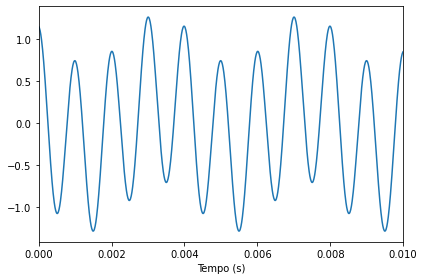

In [4]:
a = tdsp.CosSignal(freq=1000, amp=1, offset=0)
b = tdsp.CosSignal(freq=250, amp=0.3, offset=np.pi/3)
mix = a + b
wave = mix.make_wave(duration=0.1, framerate=1e5)
wave.plot()
tdsp.decorate(xlabel='Tempo (s)', xlim=[0,0.01])

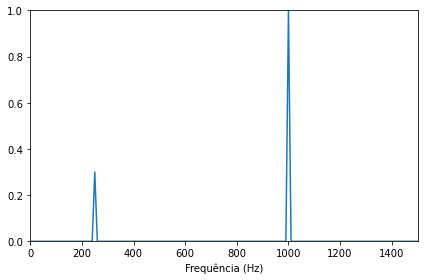

In [5]:
spectrum = wave.make_spectrum()
spectrum.scale(2/len(wave))
spectrum.plot()
tdsp.decorate(xlabel='Frequência (Hz)', xlim=[0,1500], ylim=[0,1])

In [6]:
@interact(s = fixed(spectrum), fator=(0.0,0.5, 0.01))
def spec_lp(s, fator=0.01):
    spectrum = s.copy()
    spectrum.low_pass(cutoff=600, factor=fator)
    wave_new = spectrum.make_wave()
    plt.subplot(211)
    spectrum.plot()
    tdsp.decorate(xlabel='Frequência (Hz) (passa-baixa com frequência de corte em 600Hz)', xlim=[0,1500], ylim=[0,1])
    plt.subplot(212)
    wave_new.plot()
    tdsp.decorate(xlabel='Tempo (s)', xlim=[0,0.01])

interactive(children=(FloatSlider(value=0.01, description='fator', max=0.5, step=0.01), Output()), _dom_classe…

---

# **Aula 02b: Sinais periódicos, harmônicas**

Sinais periódicos são sinais que se repetem após algum tempo. Por exemplo, se você toca um sino, ele vibra e gera som. Se você gravar esse som e plotar o sinal transduzido, ele se parecerá com uma senóide, o que significa que tem a mesma forma que a função seno trigonométrica. Podemos ver que esse tipo de sinal é periódico. 

A **frequência** de um sinal é o número de ciclos por segundo, que é o inverso do período. As unidades de frequência são ciclos por segundo, ou Hertz, abreviado como "Hz" (como número de ciclos é um número adimensional, então _x_ Hertz é realmente _x_ "por segundo"). A duração de cada ciclo completo é denominada **período**.

A frequência de um sinal senoidal pode ser reconhecido como uma nota musical, incluindo sua oitava. Se você não estiver familiarizado com a "notação científica de altura musical (_pitch_)", o sufixo numérico indica em qual oitava a nota está. Se quiser saber mais, consulte [_Scientific pitch notation_ (em inglês)](http://en.wikipedia.org/wiki/Scientific_pitch_notation).

Note que um diapasão gera uma senóide porque a vibração dos dentes é uma forma de movimento harmônico simples. A maioria dos instrumentos musicais produz sinais periódicos, mas a forma desses sinais não é senoidal. A forma de um sinal periódico é chamada de **forma de onda**. A maioria dos instrumentos musicais produz formas de onda mais complexas do que uma senóide. A forma da onda determina o _timbre musical_, que é a nossa percepção da qualidade do som. As pessoas geralmente percebem as formas de onda complexas como ricas, quentes e mais interessantes do que os senóides simples.

**Decomposição espectral** é a ideia de que qualquer sinal pode ser expresso como a soma de senóides com frequências diferentes. A ideia matemática subjacente é a _transformada discreta de Fourier_ (DFT), que pega um sinal e produz seu **espectro** (esse conjunto de senóides que se somam para produzir o sinal). O algoritmo mais importante para isso é a _transformada rápida de Fourier_ (FFT), que é uma maneira eficiente de calcular a DFT.

O componente de frequência mais baixa diferente de zero é chamado de **frequência fundamental**. A frequência fundamental não tem necessariamente a maior amplitude; a frequência que tem a maior amplitude é conhecida como **frequência dominante**. Normalmente, a altura percebida de um som (_pitch_) é determinada pela frequência fundamental, mesmo que não seja dominante.

Em um espectro, os outros componentes de frequências que são _múltiplos inteiros da fundamental_ são chamados de **harmônicas** porque são musicalmente harmoniosos com a fundamental.

In [6]:
@interact(freq_base=(500,1320,10))
def harmonics(freq_base=500):
    signal = tdsp.CosSignal(freq=440, amp=0.5, offset=0)
    for i in range(5):
        signal += tdsp.CosSignal(freq=freq_base+440*i, amp=np.exp(-i), offset=0)
    wave = signal.make_wave(duration=0.5, framerate=5e4)
    spectrum = wave.make_spectrum()
    spectrum.scale(2/len(spectrum))
    spectrum.plot()
    tdsp.decorate(xlabel='Frequência (Hz)', xlim=[0,6000])
    wave.apodize()
    return wave.make_audio()

interactive(children=(IntSlider(value=500, description='freq_base', max=1320, min=500, step=10), Output()), _d…

## **Harmônicas**

Uma senóide contém apenas um componente de frequência, então seu espectro tem apenas um pico. Formas de onda mais complicadas, como a gravação de violino, produzem DFTs com muitos picos. Vamos trabalhar agora com várias novas formas de onda; vamos olhar seus espectros para entender sua estrutura harmônica, que é o conjunto de senóides de que são compostos, e a relação entre as formas de onda e seus espectros.

### Ondas triangulares

Uma forma de onda triangular é como uma versão em linha reta de uma senóide. Matematicamente, podemos gerar uma onda triangular com a seguinte função com frequência $f$ e amplitude $a$:

$\large x_\mathrm{triangular}(t) = \dfrac{2a}{\pi}\,\arcsin\left(\sin\left(2\pi\,f\,t\right)\right)$

A aproximação por desenvolvimento em harmônicas (**síntese aditiva** de $N$ senóides) é dada por:

$\large x_\mathrm{triangular}(t) = \dfrac{8}{\pi^2}\,\displaystyle\sum_{k=0}^{N-1} \dfrac{(-1)^k}{(2k+1)^2} \sin(2\pi\cdot (2k+1)f_0\cdot t)$,

onde $N$ é o número de harmônicas a serem incluídos na aproximação, $t$ é a variável independente (por exemplo, tempo para ondas sonoras), $f_0$ é a frequência fundamental e $k$ é o rótulo identificador da harmônica. Note que matematicamente só teremos uma onda triangular quando $N \to \infty$.

Podemos simular a síntese aditiva:

In [7]:
@interact(a=fixed(1), f=fixed(200), t=fixed(np.linspace(0, 0.015, 1000)), N=(1,25,1))
def saw(a, f, t, N=1): 
    aux = np.zeros(t.shape)
    for k in range(0,N):
        aux += (-1)**k/(2*k+1)**2*np.sin(2*np.pi*(2*k+1)*f*t)
    signal = 8/np.pi**2*aux
    plt.plot(t, signal)
    plt.show()

interactive(children=(IntSlider(value=1, description='N', max=25, min=1), Output()), _dom_classes=('widget-int…

A Figura a seguir mostra uma forma de onda triangular com frequência de 200 Hz construida com a ajuda do módulo `thinkdsp.py`. Note que a classe `TriangleSignal` é herdeira da classe `Sinusoid`.

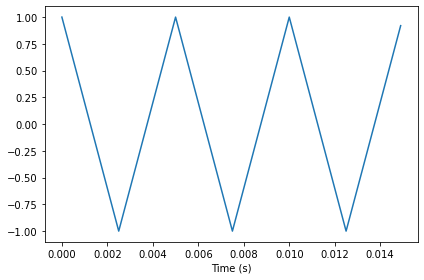

In [8]:
from thinkdsp import TriangleSignal

signal = TriangleSignal(freq=200, amp=1, offset=0)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
tdsp.decorate(xlabel='Time (s)')

Para "ouvir" essa forma de onda:

In [9]:
wave_triang = signal.make_wave(duration=0.5, framerate=10000)
wave = wave_triang
wave.apodize()
wave.make_audio()

A Figura a seguir mostra duas visualizações do resultado; a vista à direita é dimensionada para mostrar os harmônicos mais claramente. Como esperado, o pico mais alto está na frequência fundamental, 200 Hz, e há picos adicionais nas frequências harmônicas, que são múltiplos inteiros de 200.

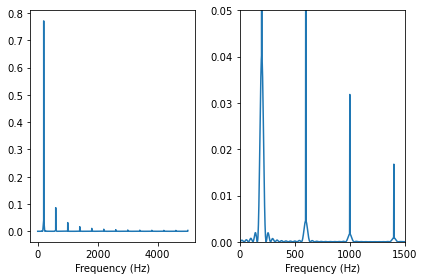

In [10]:
spectrum = wave_triang.make_spectrum()
spectrum.scale(2/len(wave))
plt.subplot(121)
spectrum.plot()
tdsp.decorate(xlabel='Frequency (Hz)')
plt.subplot(122)
spectrum.plot()
tdsp.decorate(xlabel='Frequency (Hz)', xlim=[0, 1500], ylim=[0, 0.05])

Mas uma surpresa é que não há picos nos múltiplos pares: 400, 800, etc. Os harmônicos de uma onda triangular são todos múltiplos ímpares da frequência fundamental, neste exemplo 600, 1000, 1400, etc.

Outra característica desse espectro é a relação entre a amplitude e a frequência dos harmônicos. Sua amplitude cai proporcionalmente ao quadrado da frequência. Por exemplo, a razão de frequência das duas primeiras harmônicas (200 e 600 Hz) é $3$, e a razão de amplitude é de aproximadamente $3^2=9$. A razão de frequência das próximas duas harmônicas (600 e 1000 Hz) é $1.7$, e a razão de amplitude é de aproximadamente $1.7^2 = 2.9$. Essa relação é chamada de estrutura harmônica.

### Ondas quadradas

Em uma forma de onda quadrada, a amplitude alterna em uma frequência constante entre os valores mínimo e máximo fixos. Matematicamente, podemos gerar uma onda quadrada com a seguinte função com frequência $f$ e amplitude $a$:

$\large x_\mathrm{quadrada}(t) = a\cdot\mathrm{sgn}\left(\sin\left(2\pi\,f\,t\right)\right)$, onde $\mathrm{sgn}(\cdot)$ é a [função sinal](https://pt.wikipedia.org/wiki/Função_sinal).

A aproximação por desenvolvimento em harmônicas (**síntese aditiva** de $N$ senóides) é dada por:

$\large x_\mathrm{quadrada}(t) = \dfrac{4}{\pi}\,\displaystyle\sum_{k=0}^{N-1} \dfrac{1}{2k+1} \sin(2\pi\cdot (2k+1)f_0\cdot t)$,

onde $N$ é o número de harmônicas a serem incluídos na aproximação, $t$ é a variável independente (por exemplo, tempo para ondas sonoras), $f_0$ é a frequência fundamental e $k$ é o rótulo identificador da harmônica. Note que matematicamente só teremos uma onda quadrada quando $N \to \infty$.

Podemos simular a síntese aditiva:

In [11]:
@interact(a=fixed(1), f=fixed(200), t=fixed(np.linspace(0, 0.015, 1000)), N=(1,25,1))
def saw(a, f, t, N=1): 
    aux = np.zeros(t.shape)
    for k in range(0,N):
        aux += 1/(2*k+1)*np.sin(2*np.pi*(2*k+1)*f*t)
    signal = 4/np.pi*aux
    plt.plot(t, signal)
    plt.show()

interactive(children=(IntSlider(value=1, description='N', max=25, min=1), Output()), _dom_classes=('widget-int…

A Figura a seguir mostra uma forma de onda triangular com frequência de 200 Hz construida com a ajuda do módulo `thinkdsp.py`. Note que a classe `SquareSignal` é herdeira da classe `Sinusoid`.

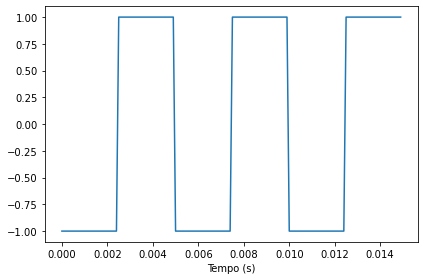

In [7]:
from thinkdsp import SquareSignal

signal = SquareSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
tdsp.decorate(xlabel='Tempo (s)')

Para "ouvir" essa forma de onda:

In [8]:
wave_squar = signal.make_wave(duration=0.5, framerate=10000)
wave = wave_squar
wave.apodize()
wave.make_audio()

A Figura a seguir mostra duas visualizações do resultado, no mesmo esquema utilizado pra onda triangular; a vista à direita é dimensionada para mostrar os harmônicos mais claramente. Como esperado, o pico mais alto está na frequência fundamental, 200 Hz, e há picos adicionais nas frequências harmônicas, que são múltiplos inteiros de 200.

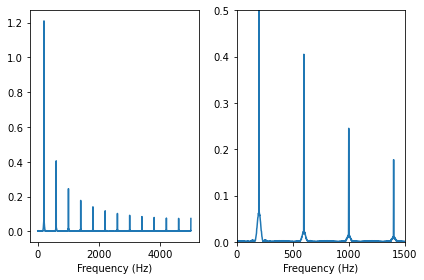

In [9]:
spectrum = wave_squar.make_spectrum()
spectrum.scale(2/len(wave))
plt.subplot(121)
spectrum.plot()
tdsp.decorate(xlabel='Frequency (Hz)')
plt.subplot(122)
spectrum.plot()
tdsp.decorate(xlabel='Frequency (Hz)', xlim=[0, 1500], ylim=[0, 0.5])

Como na onda triangular, a onda quadrada contém apenas harmônicos ímpares, razão pela qual existem picos em 600, 1000, 1400 Hz, etc. Mas a amplitude dos harmônicos diminui mais lentamente. Especificamente, a amplitude cai em proporção à frequência (não à frequência ao quadrado).

### Ondas dentes de serra

A forma de onda dente de serra é assim conhecida devido à sua semelhança com os dentes de uma serra. Um único dente de serra, ou dente de serra disparado intermitentemente, é também chamado de forma de onda de rampa. Portanto, consiste em uma sequência infinita de funções de rampa truncadas e concatenadas. Matematicamente, podemos gerar uma onda triangular com a seguinte função com frequência $f$ e amplitude $a$:

$\large x_\mathrm{serra}(t) = a\,\mathrm{frac}\left(f\,t\right)$, onde $\mathrm{frac}(\cdot)$ é a função que retorna a [parte fracionária](https://pt.wikipedia.org/wiki/Parte_fracionária) do número.

A aproximação por desenvolvimento em harmônicas (**síntese aditiva** de $N$ senóides) é dada por:

$\large x_\mathrm{serra}(t) = -\dfrac{2a}{\pi}\,\displaystyle\sum_{k=1}^{N} \dfrac{(-1)^k}{k} \sin(2\pi\cdot k f_0\cdot t)$,

onde $N$ é o número de harmônicas a serem incluídos na aproximação, $t$ é a variável independente (por exemplo, tempo para ondas sonoras), $f_0$ é a frequência fundamental e $k$ é o rótulo identificador da harmônica. Note que matematicamente só teremos uma onda triangular quando $N \to \infty$.

Podemos simular a síntese aditiva:

In [15]:
@interact(a=fixed(1), f=fixed(200), t=fixed(np.linspace(0, 0.015, 1000)), N=(1,25,1))
def saw(a, f, t, N=1): 
    aux = np.zeros(t.shape)
    for k in range(1,N+1):
        aux += (-1)**k/k*np.sin(2*np.pi*k*f*t)
    signal =  -2*a/np.pi*aux
    plt.plot(t, signal)
    plt.show()

interactive(children=(IntSlider(value=1, description='N', max=25, min=1), Output()), _dom_classes=('widget-int…

A Figura a seguir mostra uma forma de onda triangular com frequência de 200 Hz construida com a ajuda do módulo `thinkdsp.py`. Note que a classe `SawtoothSignal` é herdeira da classe `Sinusoid`.

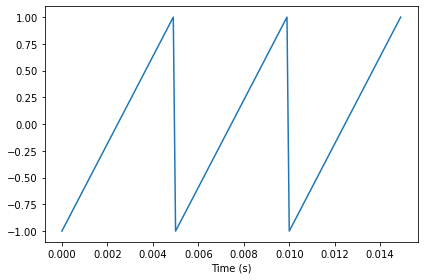

In [16]:
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(freq=200, offset=0)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
tdsp.decorate(xlabel='Time (s)')

Para "ouvir" essa forma de onda:

In [17]:
wave_saw = signal.make_wave(duration=0.5, framerate=10000)
wave = wave_saw
wave.apodize()
wave.make_audio()

A Figura a seguir mostra duas visualizações do resultado, no mesmo esquema utilizado pra onda triangular; a vista à direita é dimensionada para mostrar os harmônicos mais claramente. Como esperado, o pico mais alto está na frequência fundamental, 200 Hz, e há picos adicionais nas frequências harmônicas, que são múltiplos inteiros de 200.

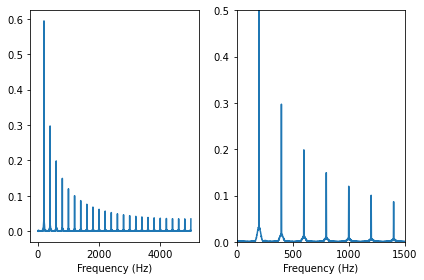

In [19]:
spectrum = wave_saw.make_spectrum()
spectrum.scale(2/len(wave))
plt.subplot(121)
spectrum.plot()
tdsp.decorate(xlabel='Frequency (Hz)')
plt.subplot(122)
spectrum.plot()
tdsp.decorate(xlabel='Frequency (Hz)', xlim=[0, 1500], ylim=[0, 0.5])

Ao contrário das ondas triangular e quadrada, a onde dente de serra contém ambos harmônicos pares e ímpares, razão pela qual existem picos em 400, 600, 800, 1000, 1200, 1400 Hz, etc. Mas a amplitude dos harmônicos diminui nem tão lentamente quanto na quadrada, mas mais lento que na triangular. Especificamente, a amplitude cai em proporção à frequência (não a frequência ao quadrado).

---

# **Aula 02c: Efeito de _Aliasing_**

Em processamento de sinais, é mais fácil descrever o _aliasing_ em termos de um sistema discreto visual que todos conhecemos: filmes. Se você já assistiu a uma cena e viu a roda de um carroção, uma calota desenhada ou mesmo a hélice de um avião parecendo estar rodando para trás, você testemunhou o _aliasing_. A taxa de quadros do filme não é adequada para descrever a frequência de rotação da roda, e nossos olhos são consequentemente enganados.

O efeito de _aliasing_ ocorre quando um evento dinâmico não é amostrado com uma taxa rápida o suficiente para realmente capturar o que está acontecendo.

![Efeito de Aliasing](https://community.sw.siemens.com/servlet/rtaImage?eid=ka54O000000kCrS&feoid=00N4O000006LZn5&refid=0EM4O000000mluW)

Fonte: Animação retirada do site da Siemens, matéria [_Data Acquisition: Anti-Aliasing Filters_](https://community.sw.siemens.com/s/article/data-acquisition-anti-aliasing-filters)

## **Análise temporal de _aliasing_**

Vamos realizar um experimento: duas senóides amostradas com a mesma taxa, uma com frequência igual ou inferior ao limite de Nyquist e outra com frequência igual ou superior. A análise realizada é no domínio do tempo.

In [20]:
from thinkdsp import CosSignal

@interact(freq1=(100,5000,100), freq2=(5000,9900,100), original=False)
def aliasing_in_time(freq1=5000, freq2=5000, original=False):
    signal1 = CosSignal(freq=freq1)
    signal2 = CosSignal(freq=freq2)
    duration = np.min([signal1.period, signal2.period])*5
    sampling_rate = 10000 #Hz
    segment1 = signal1.make_wave(duration, framerate=sampling_rate)
    segment2 = signal2.make_wave(duration, framerate=sampling_rate)
    plt.figure(figsize=graph_size(7))
    if original:
        aux = np.linspace(0, np.max(segment1.ts), 1000)
        plt.plot(aux, np.cos(2*np.pi*freq1*aux), '-y', label=f'original {freq1}Hz')
        plt.plot(aux, np.cos(2*np.pi*freq2*aux), '-.', color='gray', label=f'original {freq2}Hz')
    segment1.plot(color='b', linestyle='-', marker='*', label=f'{freq1}Hz')
    segment2.plot(color='r', linestyle='-.', marker='o',  label=f'{freq2}Hz')
    tdsp.decorate(xlabel='Tempo (s)')

interactive(children=(IntSlider(value=5000, description='freq1', max=5000, min=100, step=100), IntSlider(value…

O problema deve ser claro: embora os sinais sejam diferentes, as formas de ondas discretizadas são idênticas. Quando amostramos um sinal de 5.500 Hz a 10.000 quadros por segundo, o resultado é indistinguível de um sinal de 4.500 Hz. Pela mesma razão, um sinal de 7.700 Hz é indistinguível de 2.300 Hz e um sinal de 9.900 Hz é indistinguível de 100 Hz.

## **Análise espectral de _aliasing_**

Agora, vamos investigar o espectro de uma onda triangular com frequência 1100 Hz, amostrada em 10.000 quadros por segundo (taxa de amostragem de 10kHz). Novamente, a vista à direita é dimensionada para mostrar os harmônicos.

In [21]:
from thinkdsp import TriangleSignal

@interact(amostragem=(9000,12000,100))
def aliasing_in_freq(amostragem=11000):
    signal = TriangleSignal(1100)
    segment = signal.make_wave(duration=0.5, framerate=amostragem)
    spectrum = segment.make_spectrum()
    spectrum.scale(2/len(segment))
    plt.figure(figsize=graph_size(7))
    plt.subplot(121)
    spectrum.plot()
    tdsp.decorate(xlabel='Frequency (Hz)', xlim=[0,amostragem])
    plt.subplot(122)
    spectrum.plot()
    tdsp.decorate(xlabel='Frequency (Hz)', ylim=[0, 0.2], xlim=[0,amostragem/2+1])

interactive(children=(IntSlider(value=11000, description='amostragem', max=12000, min=9000, step=100), Output(…

Quando amostramos com taxa de 10.000 Hz, os harmônicos dessa onda deveriam estar em 3.300, 5.500, 7.700 e 9.900 Hz. Mas observando a figura, vemos picos em 1.100 e 3.300 Hz, como esperado, mas o terceiro pico está em 4.500, não em 5.500 Hz. O quarto pico está em 2.300, não em 7.700 Hz. O pico que deveria estar em 9.900 está, na verdade, em 100 Hz. 

O problema é que, ao avaliar o sinal em pontos distintos no tempo, você perde informações sobre o que aconteceu entre as amostras. Para componentes de baixa frequência, isso não é um problema, porque você tem muitas amostras por período.

Mas se amostrarmos um sinal com frequência de 5.000 Hz com 10.000 quadros por segundo, teremos apenas duas amostras por período. Isso acaba sendo o suficiente, por pouco, mas se a frequência do sinal for mais alta, não será possível recuperar essa informação.

O efeito de quando um sinal de alta frequência é amostrado, ele parecer ser um sinal de baixa frequência é chamado de **_aliasing_**.

No exemplo da onda triangular, a frequência mais alta que podemos medir é a de 5.000 Hz, o limite de Nyquist para uma taxa de amostragem de 10 kHz. Freqüências acima de 5.000 Hz são "dobradas" para abaixo de 5.000 Hz, razão pela qual esse limite é às vezes chamado de "freqüência de dobradura" (**_folding frequency_**). Às vezes também é chamada de "frequência de Nyquist".

O padrão de dobradura continua se a frequência com _aliasing_ ficar abaixo de zero. Por exemplo, o 5º harmônico da onda triangular de 1.100 Hz está em 12.100 Hz. Dobrado com referência em 5.000 Hz, ele apareceria a -2.100 Hz, mas é dobrado novamente com referência em 0 Hz, de volta a 2.100 Hz. Na verdade, você pode ver um pequeno pico a 2.100 Hz no espectro da onda triangular, sendo o próximo a 4.300 Hz.

In [22]:
@interact(f0=fixed(1100), sr=fixed(10000), zoom=(0.001, 1, 0.0005))
def aliasing_detail(f0, sr, zoom=1):
    signal = TriangleSignal(f0)
    segment = signal.make_wave(duration=0.5, framerate=sr)
    spectrum = segment.make_spectrum()
    spectrum.scale(2/len(segment))
    nyquist = sr/2
    freqs, amps = [], []
    for k in range(0, 30):
        amps.append(np.abs((-1)**k/(2*k+1)**2))
        aux = (2*k+1)*f0
        fr = aux % nyquist
        if (aux//nyquist) % 2 == 1:
            fr = nyquist - fr
        freqs.append(fr)
    plt.figure(figsize=graph_size(7))
    spectrum.plot()
    plt.plot(freqs, amps, ':*r')
    tdsp.decorate(xlabel='Frequency (Hz)', ylim=[0, zoom], xlim=[0,nyquist])
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='zoom', max=1.0, min=0.001, step=0.0005), Output()), …

### Como lidar com o _aliasing_?

Uma das maneiras de se resolver o _aliasing_, ou eliminá-lo para um estudo em específico, é usar um **filtro passa-baixa** com frequência de corte igual ao limite de Nyquist no momento de aquisição do sinal. Quando isso não é possível, temos que tratá-lo discretamente. Existe um problema, entretanto, que impede de eliminar altas frequências a partir de métodos como `Spectrum.low_pass`: a partir do momento que o espectro é calculado, já temos as frequências de _aliasing_ misturado com as frequências de interesse.

O que podemos fazer é gerar uma função filtro e aplicar convolução com o sinal original. Mas esses serão temas de aulas futuras.

---

# **Aula 02d: Detalhes para computar o espectro**

O módulo `thinkdsp.py` utiliza o módulo `numpy.fft` que fornece funções relacionadas à Transformada Rápida de Fourier (FFT), que é um algoritmo eficiente que calcula a Transformada Discreta de Fourier (DFT). O método `make_spectrum` da classe `Spectrum` usa a função originalmente conhecida como [`rfft` (documentação em inglês)](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html) para calcular a FFT para sinais reais, com o apoio da função [`rfftfreq` (documentação em inglês)](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfftfreq.html) para o cálculo das frequências correspondentes:

- O resultado de `rfft` é [um _numpy array_ (documentação em inglês)](https://numpy.org/doc/stable/reference/generated/numpy.array.html) com números complexos que representa a amplitude (módulo ou magnitude) e o deslocamento de fase (argumento ou ângulo) de cada componente de frequência na onda.

- Para facilitar encontrar as frequências que equivalem a cada número complexo resultante da FFT, a função `rfftfreq` retorna um _numpy array_ com as frequências correspondentes.

Note que a função original e mais completa [`fft` (documentação em inglês)](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html) já consegue consegue lidar com sinais complexos.

Embora temos acesso às partes reais e imaginárias do espectro, quase nunca precisaremos acessar a parte imaginária. Pense na DFT como um vetor de amplitudes e fases que são codificados na forma de números complexos.

### Notas importantes 

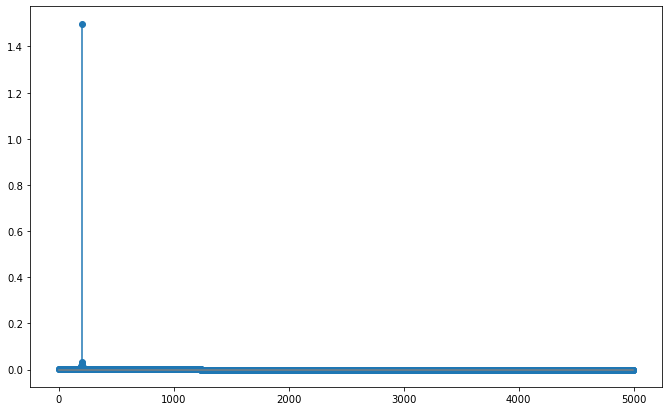

In [10]:
sr = 10000 #HZ, taxa de amostragem
d = 0.5 #seg, duração
signal = lambda a, f, t: a*np.cos(2*np.pi*f*t)
wave = signal(1.5, 200, np.linspace(0, d, int(d*sr)))

fft = np.fft.fft(wave)
n = len(wave)
fft *= 2/n
freqs = np.fft.fftfreq(n, d=1./sr)
plt.figure(figsize=graph_size(7))
# plt.stem(np.abs(fft), basefmt='gray')
# plt.stem(freqs, np.abs(fft), basefmt='gray')
plt.stem(freqs[0:n//2], np.abs(fft[0:n//2]), basefmt='gray',use_line_collection=True)
plt.show()

Ajustes necessários para a FFT de sinais reais:

- Se estiver computando a FFT completa, é necessário utilizar somente a primeira metade dos valores computados;
- As frequências precisam ser calculadas em um vetor separado;
- As amplitudes das magnitudes encontradas pela FFT devem ser ajustadas dividindo-se pelo número de amostras do sinal original e multiplicando por 2 (sinal refletido).

### Exemplo onda dente de serra: Numpy FFT

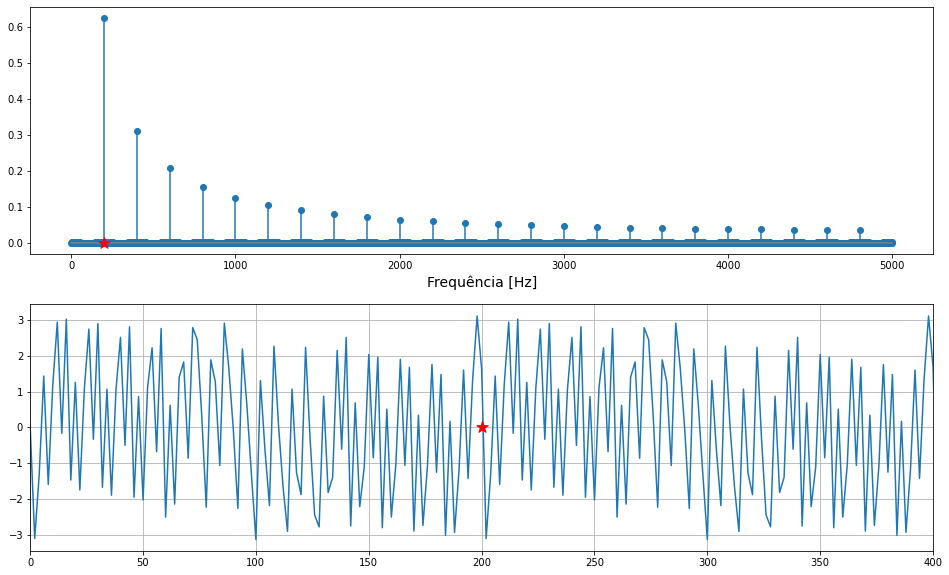

In [26]:
sr = 10000 #HZ, taxa de amostragem
d = 0.5 #seg, duração
signal = SawtoothSignal(200)
wave = signal.make_wave(duration=d, framerate=sr)
fft = np.fft.fft(wave.ys)
n = len(wave)
fft *= 2/n
freqs = np.fft.fftfreq(n, d=1./sr)
plt.figure(figsize=graph_size(10))
plt.subplot(211)
plt.stem(freqs[0:n//2], np.abs(fft)[0:n//2], basefmt='gray', use_line_collection=True)
plt.scatter(200,0,144,marker='*', color='r', zorder=5)
# plt.scatter(-200,0,144,marker='*', color='orange', zorder=5)
plt.xlabel("Frequência [Hz]", fontsize=14)
plt.subplot(212)
plt.plot(freqs[0:n//2], np.angle(fft)[0:n//2])
plt.scatter(200,0,144,marker='*', color='r', zorder=5)
# plt.scatter(-200,0,144,marker='*', color='orange', zorder=5)
# plt.xlim([-400,400])
plt.xlim([0,400])
plt.grid('on')
plt.show()

### Exemplo onda dente de serra: Numpy RFFT

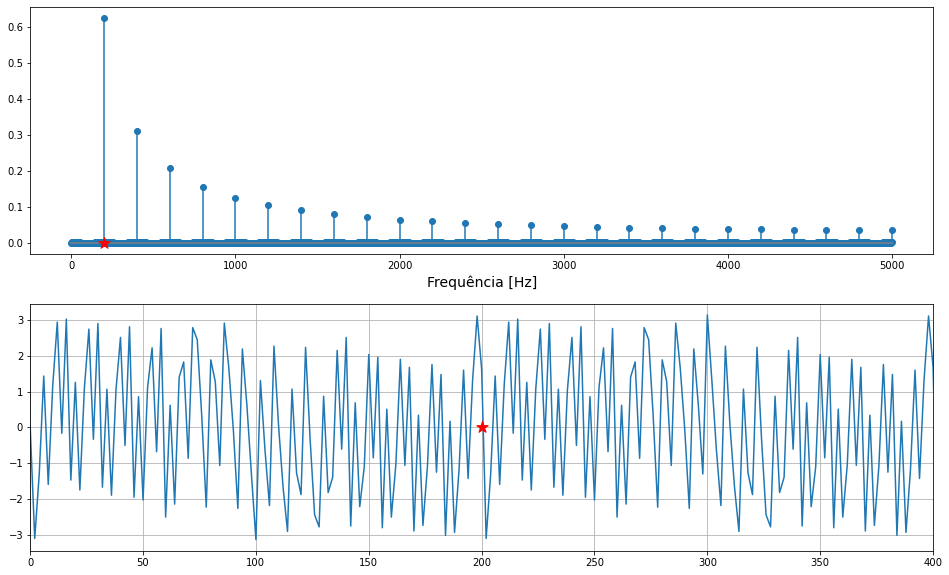

In [28]:
sr = 10000 #HZ, taxa de amostragem
d = 0.5 #seg, duração
signal = SawtoothSignal(200)
wave = signal.make_wave(duration=d, framerate=sr)
fft = np.fft.rfft(wave.ys)
n = len(wave)
fft *= 2/n
freqs = np.fft.rfftfreq(n, d=1./sr)
plt.figure(figsize=graph_size(10))
plt.subplot(211)
plt.stem(freqs, np.abs(fft), basefmt='gray', use_line_collection=True)
plt.scatter(200,0,144,marker='*', color='r', zorder=5)
plt.xlabel("Frequência [Hz]", fontsize=14)
plt.subplot(212)
plt.plot(freqs, np.angle(fft))
plt.scatter(200,0,144,marker='*', color='r', zorder=5)
plt.xlim([0,400])
plt.grid('on')
plt.show()

### Exemplo onda dente de serra: ThinkDSP Spectrum

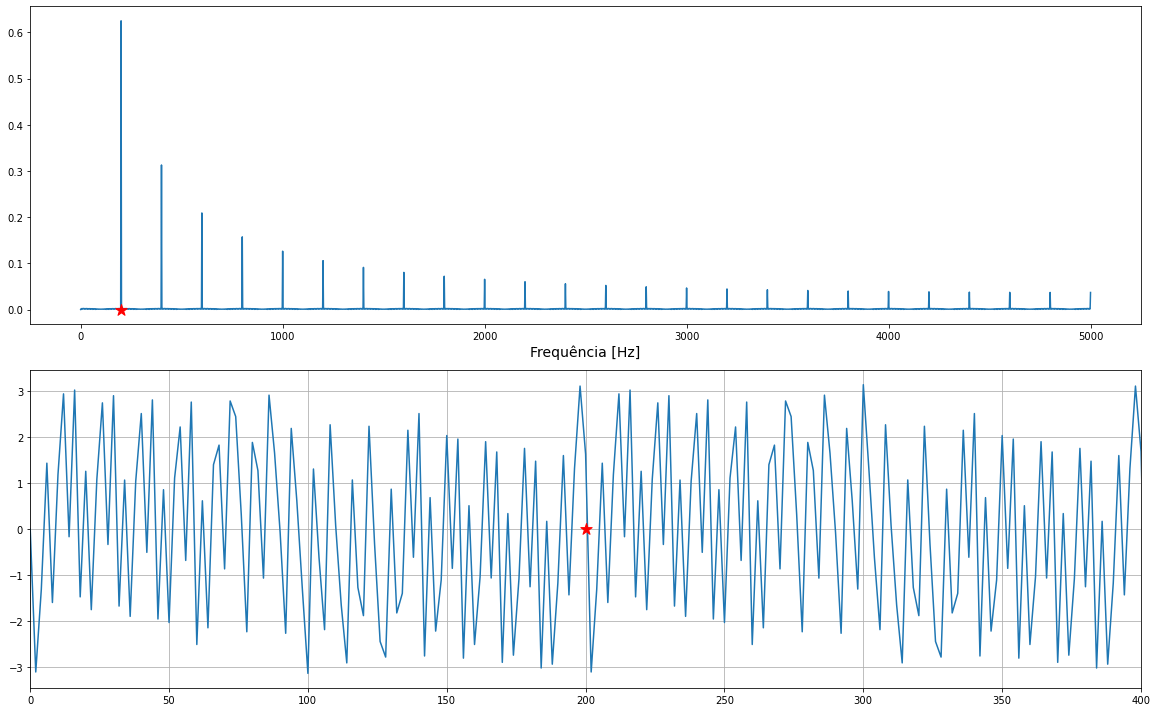

In [29]:
sr = 10000 #HZ, taxa de amostragem
d = 0.5 #seg, duração
signal = SawtoothSignal(200)
wave = signal.make_wave(duration=d, framerate=sr)
spectrum = wave.make_spectrum()
spectrum.scale(2/len(wave))
plt.figure(figsize=graph_size(10))
plt.subplot(211)
spectrum.plot()
plt.scatter(200,0,144,marker='*', color='r', zorder=5)
plt.xlabel("Frequência [Hz]", fontsize=14)
plt.subplot(212)
plt.plot(spectrum.fs, spectrum.angles)
plt.scatter(200,0,144,marker='*', color='r', zorder=5)
plt.grid('on')
tdsp.decorate(xlim=[0,400])

## **Impacto no sinal da fase do espectro**

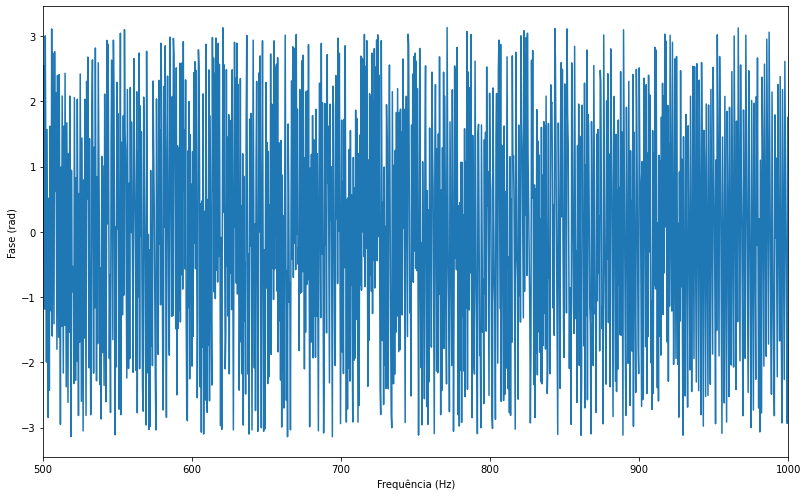

In [30]:
sr = 10000 #HZ, taxa de amostragem
d = 0.5 #seg, duração
wave = tdsp.read_wave('suporte/426908__dersuperanton__hello-male.wav')
hs = np.fft.rfft(wave.ys)
n = len(wave)
fs = np.fft.rfftfreq(n, 1./sr)
magnitude = np.absolute(hs)#*2/n
angle = np.angle(hs)
plt.figure(figsize=graph_size(7))
plt.plot(fs, angle)
tdsp.decorate(xlabel='Frequência (Hz)', ylabel='Fase (rad)', xlim=[500,1000])

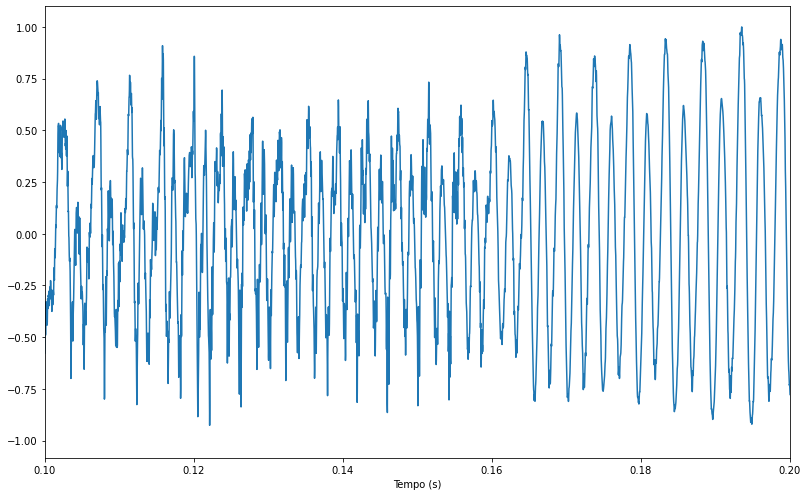

In [32]:
plt.figure(figsize=graph_size(7))
wave.plot()
tdsp.decorate(xlabel='Tempo (s)', xlim=[0.1, 0.2])
wave.make_audio()

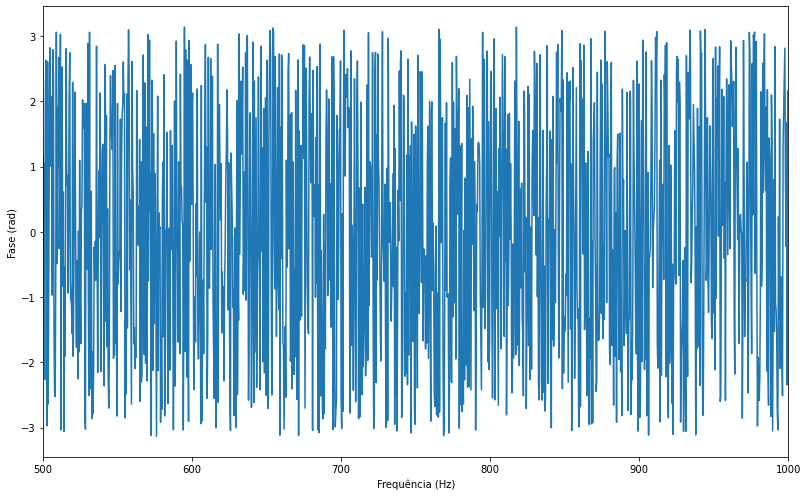

In [37]:
import random

random.shuffle(angle)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(1j * angle)
wave2 = spectrum.make_wave()
plt.figure(figsize=graph_size(7))
plt.plot(fs, angle)
tdsp.decorate(xlabel='Frequência (Hz)', ylabel='Fase (rad)', xlim=[500,1000])

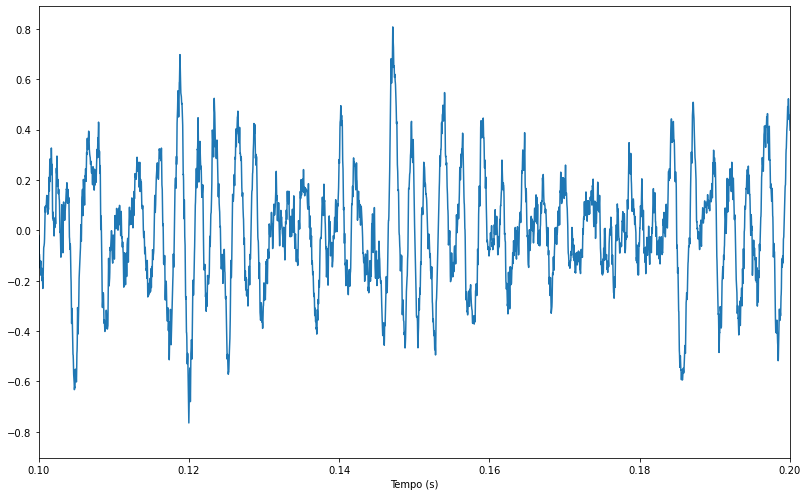

In [38]:
plt.figure(figsize=graph_size(7))
wave2.plot()
tdsp.decorate(xlabel='Tempo (s)', xlim=[0.1, 0.2])
wave2.make_audio()

Mesmo que os dois sinais tenham formas de onda diferentes, eles têm os mesmos componentes de frequência com as mesmas amplitudes. Eles diferem apenas na fase. Tendemos a ignorar a fase em decomposições espectrais para estudos de sinais, mas ambas magnitude e fase são informações básicas e independentes sobre um sinal. Enquanto a amplitude informa o quão forte é um harmônico em um sinal, a fase informa onde esse harmônico está no tempo. 

Aplicado à audição, podemos estimar a força da sirene de uma ambulância (amplitude no espectro acústico) e estimar a direção de onde o carro está vindo com base na diferença de fase do som que chega a ambos seus ouvidos. Outro exemplo, o princípio utilizado em Cancelamento Ativo de Ruído em alguns fones de ouvido também dá uma boa impressão de como a informação de fase é necessária nos sistemas auditivos.

Uma razão relacionada pela qual a fase é tão importante é que fenômenos na natureza (e.g. mecânica quântica, eletromagnetismo) são baseados em interferência. Ondas de determinadas magnitudes interagem por meio de suas fases para produzir as amplitudes de suas resultantes. Por exemplo, adicionar duas senóides idênticas de mesma fase duplica a amplitude do sinal, enquanto adicionar duas senóides de mesma amplitude, mas com fases defasadas em 180° elimina a resultante.



---
---